# Figure 4. Embedding of the excitation-inhibition developmental pattern in the PNC dataset along the sensorimotor-association axis

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR and $IMAGEN_PROJECT_DIR

In [2]:
import os
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import statsmodels.stats.multitest

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
}
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot, stats, datasets

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 12, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = "#44546A"
red = matplotlib.cm.get_cmap("RdBu_r")(240)
blue = matplotlib.cm.get_cmap("RdBu_r")(15)
parcels = transform.load_ordered_parcel_labels("schaefer-100")

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load PNC age effects map:

In [3]:
stats_age_pnc = pd.read_csv("p_pnc_fc-sub_sc-sub_runs-2_IE_age_stats.csv", index_col=0)

## A. Spatial correlation with the sensorimotor-association axis

Load maps:

In [4]:
maps = datasets.load_maps("schaefer-100", "sydnor2021")

map_names = [
    "SA Axis",
    "T1w/T2w",
    "FC G1",
    "Evo. expansion",
    "Allometric scaling",
    r"O$^{2}$ CMR",
    "Glu. CMR",
    "CBF",
    "Gene PC1",
    "NeuroSynth PC1",
    "LTC G1",
    "Thickness",
]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Spin test:

In [5]:
r_aget_maps, p_aget_maps, _ = stats.spin_test_parcellated(
    maps, stats_age_pnc[["t"]], "schaefer-100", n_perm=1000
)
print("Correlation coefficients\n", r_aget_maps, "\nSpin p-values\n", p_aget_maps)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficients
      SAaxis  myelinmap  fcgradient01    evoexp  scalingpnc     cmr02  \
t -0.617267   0.436948     -0.691227 -0.414384   -0.339732  0.074048   

    cmruglu   meancbf   genepc1    cogpc1     ltcg1  thickness  
t -0.218927 -0.116725  0.336285  0.346128 -0.010496  -0.222193   
Spin p-values
    SAaxis  myelinmap  fcgradient01  evoexp  scalingpnc  cmr02  cmruglu  \
t     0.0        0.0           0.0     0.0       0.002   0.49    0.029   

   meancbf  genepc1  cogpc1  ltcg1  thickness  
t    0.238    0.005   0.003  0.907      0.031  


Plot:

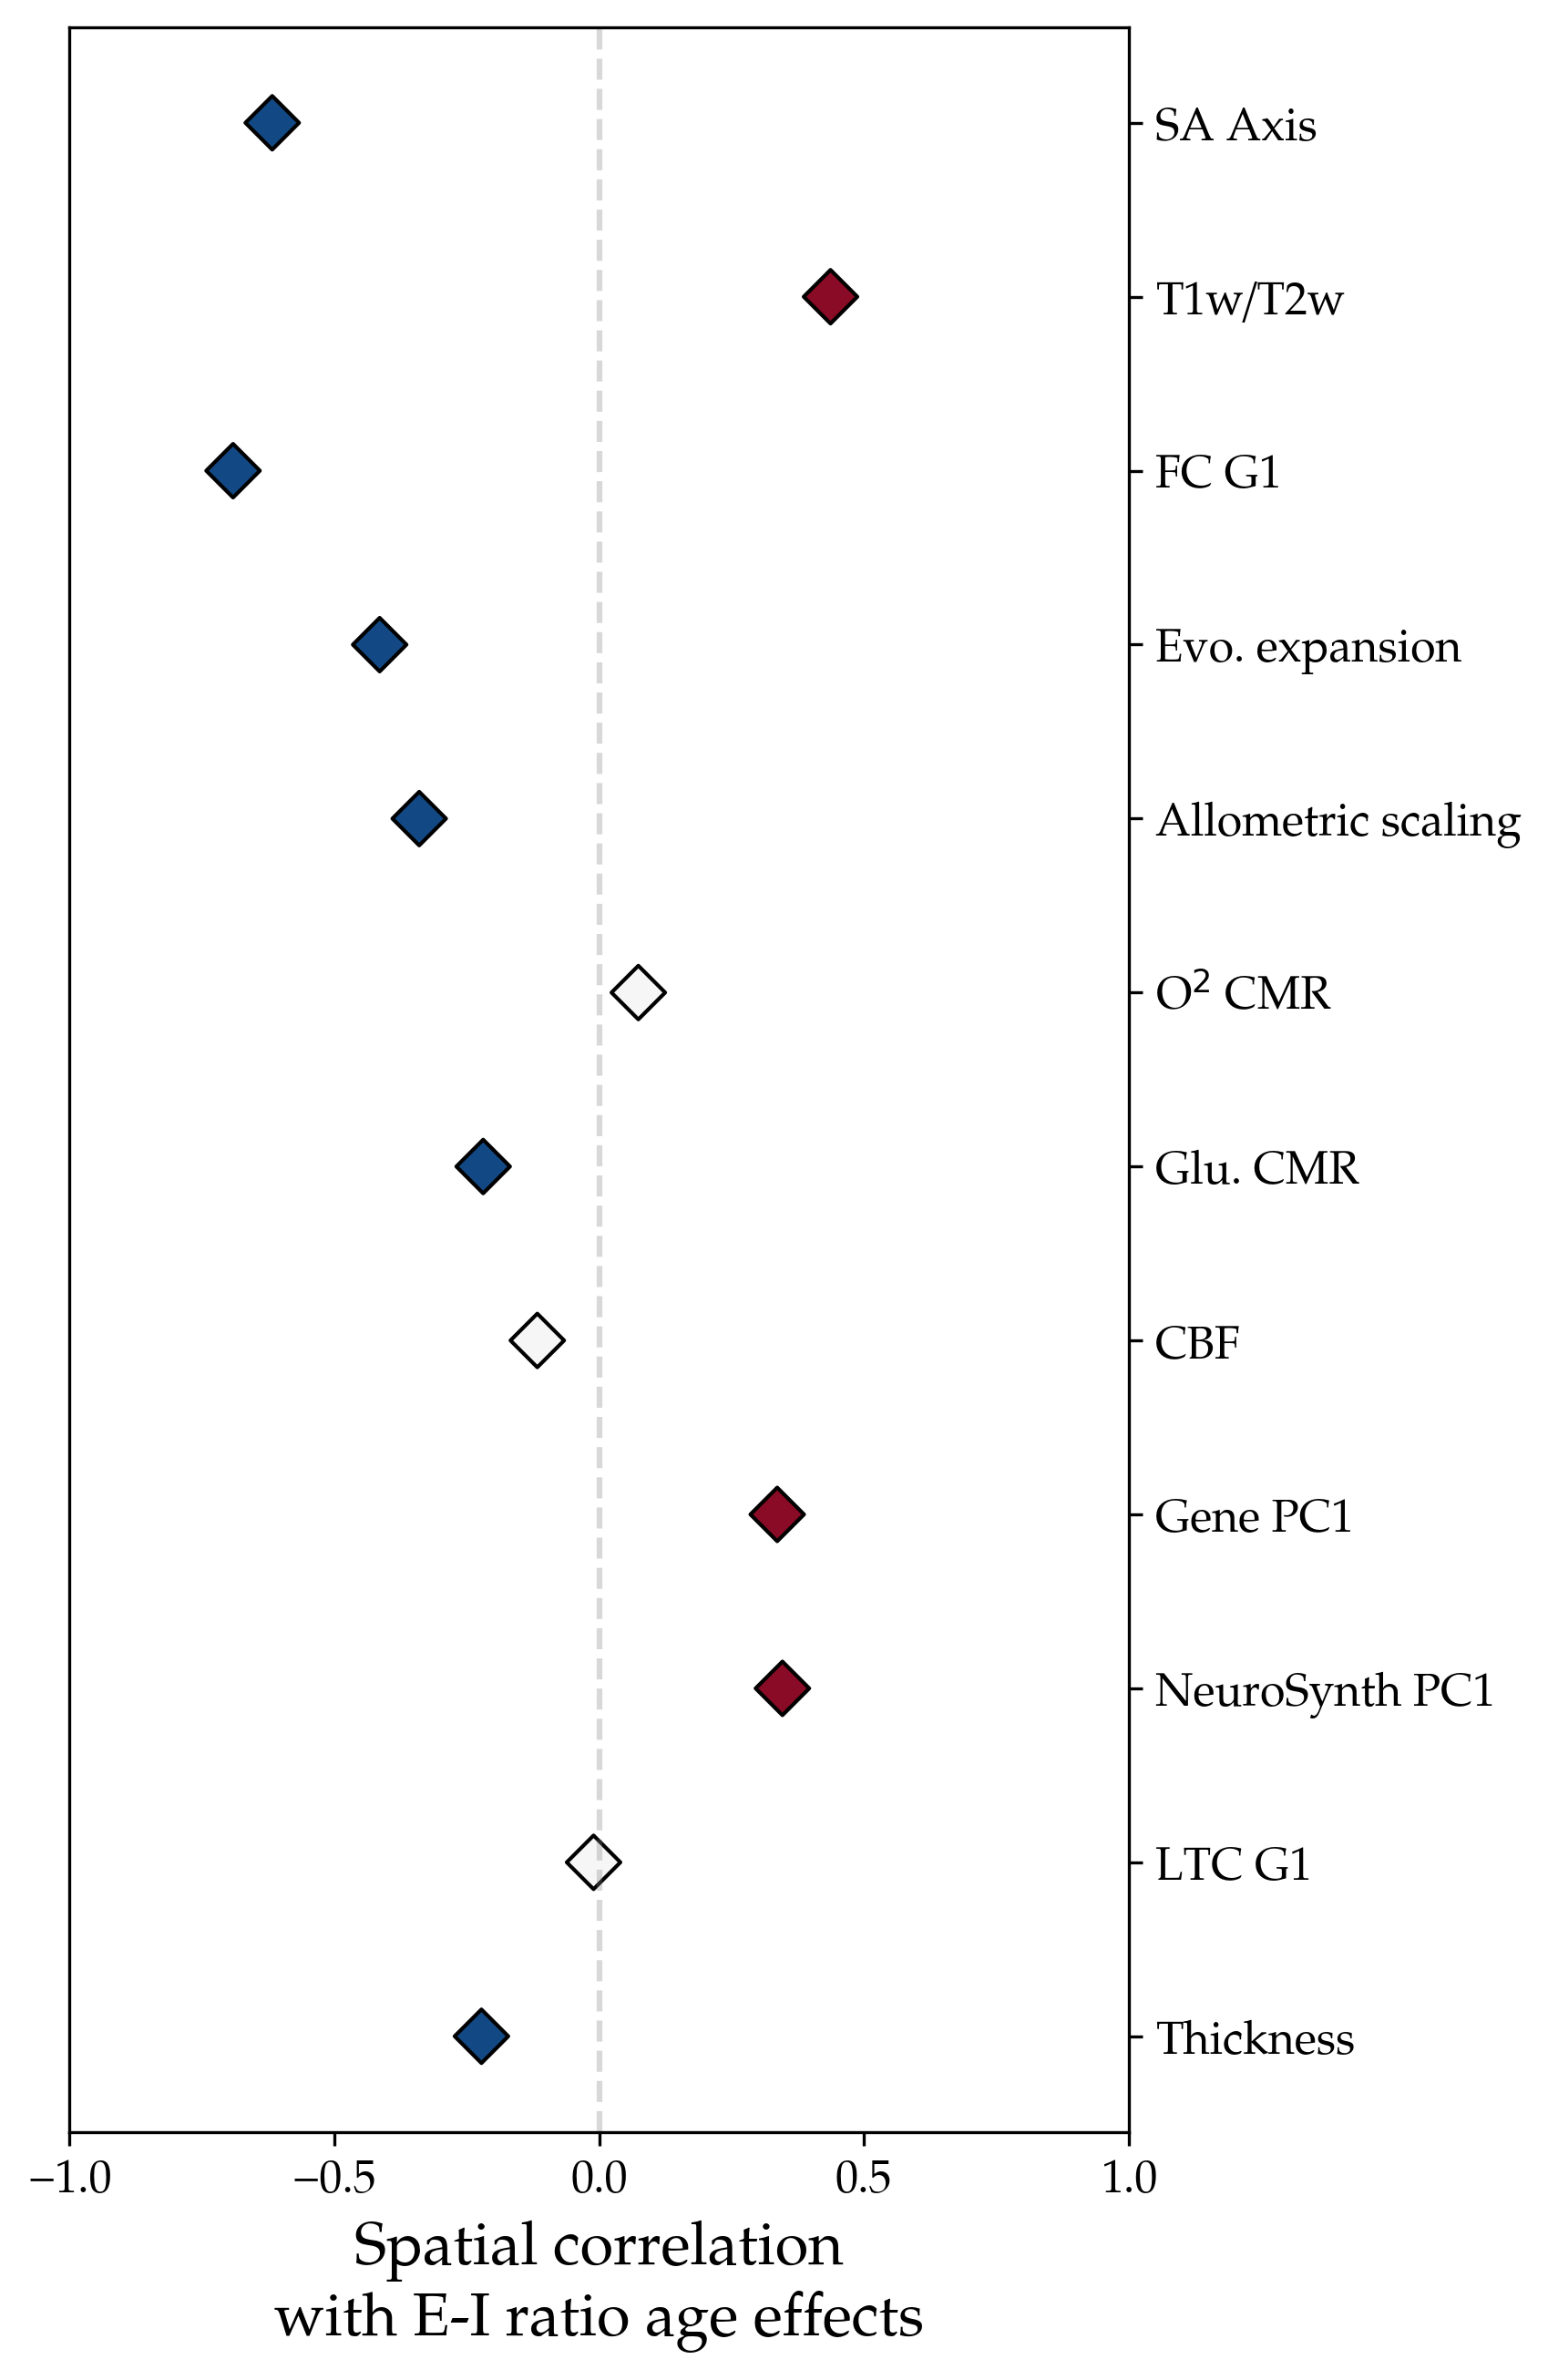

In [6]:
fig, ax = plt.subplots(figsize=(5, 10))
c_array = r_aget_maps.copy()
c_array[p_aget_maps >= 0.05] = 0
c_array[c_array < 0] = -0.9
c_array[c_array > 0] = 0.9
ax.scatter(
    y=r_aget_maps.columns,
    x=r_aget_maps.T.values[:, 0],
    c=c_array.T.values[:, 0],
    cmap="RdBu_r",
    s=100,
    marker="D",
    edgecolors="black",
    vmin=-1,
    vmax=1,
)
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.yaxis.tick_right()
ax.set_xlim([-1, 1])
ax.set_xlabel(
    "Spatial correlation\nwith E-I ratio age effects", fontsize=16
)
ax.set_yticklabels(map_names, rotation=0)
ax.axvline(0, linestyle="--", c="grey", alpha=0.3)
# fig.savefig('./figures/4A.svg', bbox_inches='tight', pad_inches=0, dpi=1200)

## B. Association with canonical resting state networks

Plot association:

Text(273.91666666666663, 0.5, 'Effect of age on E-I ratio')

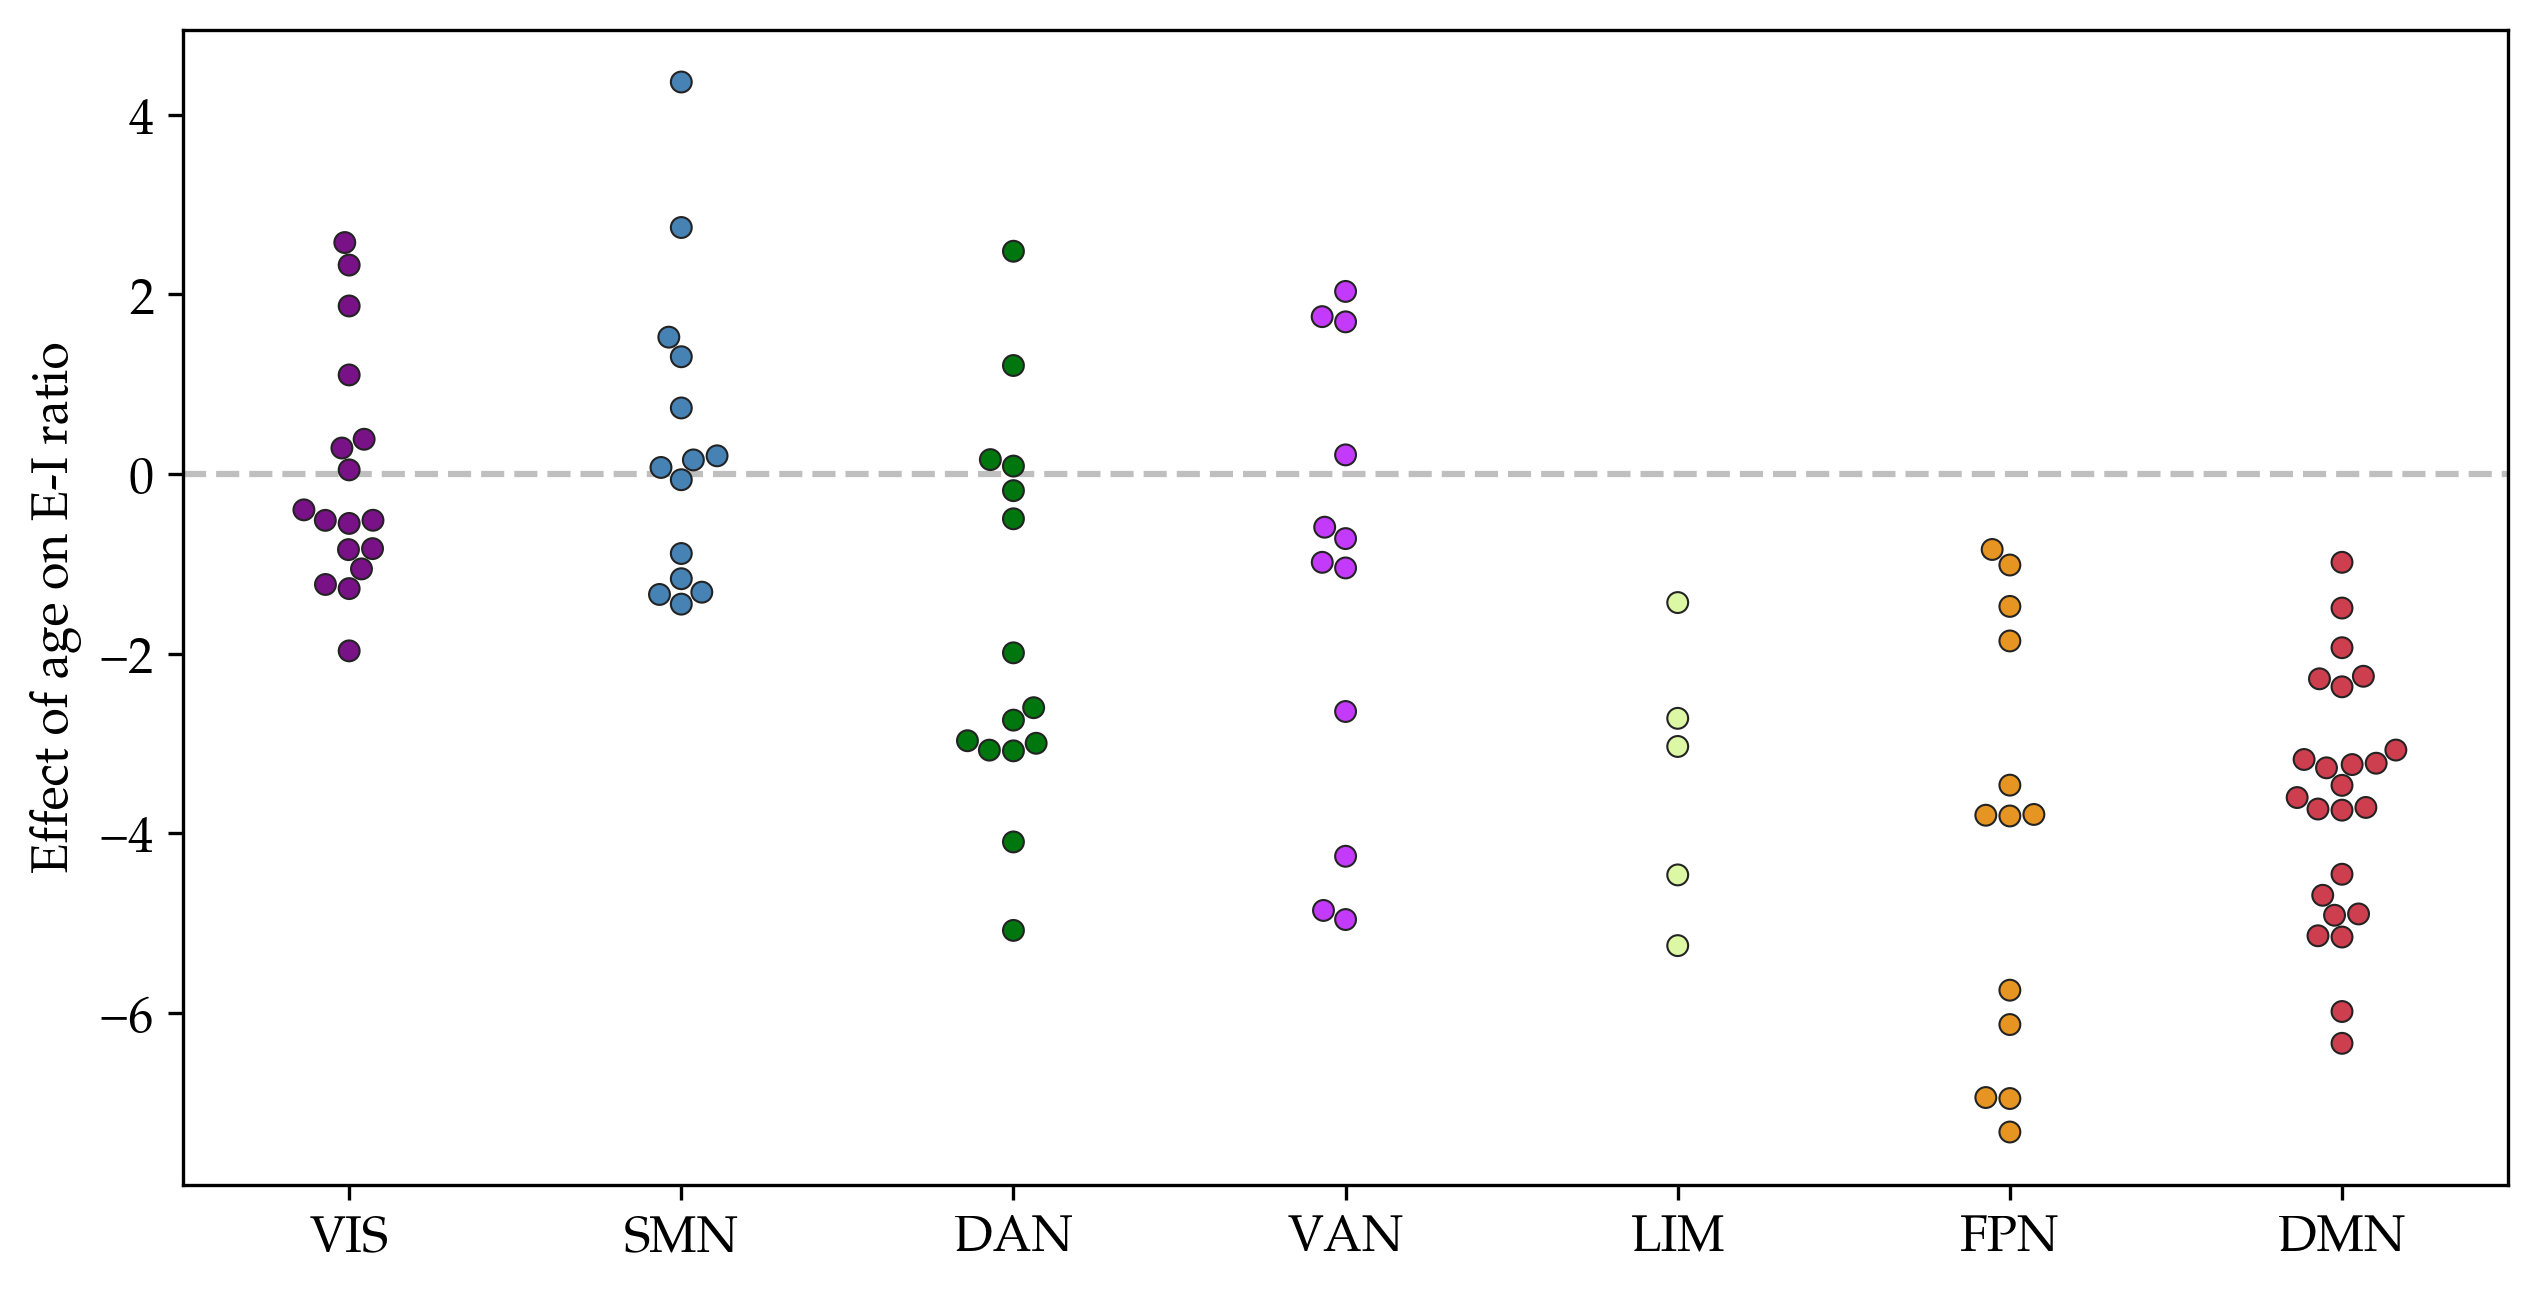

In [5]:
# define Yeo network of each parcel based on its name
yeo = list(map(lambda s: s.split("_")[2], parcels))

yeo_colors = [
    (0.470588, 0.0705882, 0.52549),
    (0.27451, 0.509804, 0.705882),
    (0.0, 0.462745, 0.054902),
    (0.768627, 0.227451, 0.980392),
    (0.862745, 0.972549, 0.643137),
    (0.901961, 0.580392, 0.133333),
    (0.803922, 0.243137, 0.305882),
]

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, linestyle="--", color="grey", alpha=0.5)
sns.swarmplot(x=yeo, y=stats_age_pnc["t"], palette=yeo_colors, ax=ax, linewidth=0.5)
ax.set_xticklabels(["VIS", "SMN", "DAN", "VAN", "LIM", "FPN", "DMN"])
ax.set_xlabel("")
ax.set_ylabel("Effect of age on E-I ratio")
# fig.savefig('./figures/4B.svg', bbox_inches='tight', pad_inches=0, dpi=1200)

Plot map:

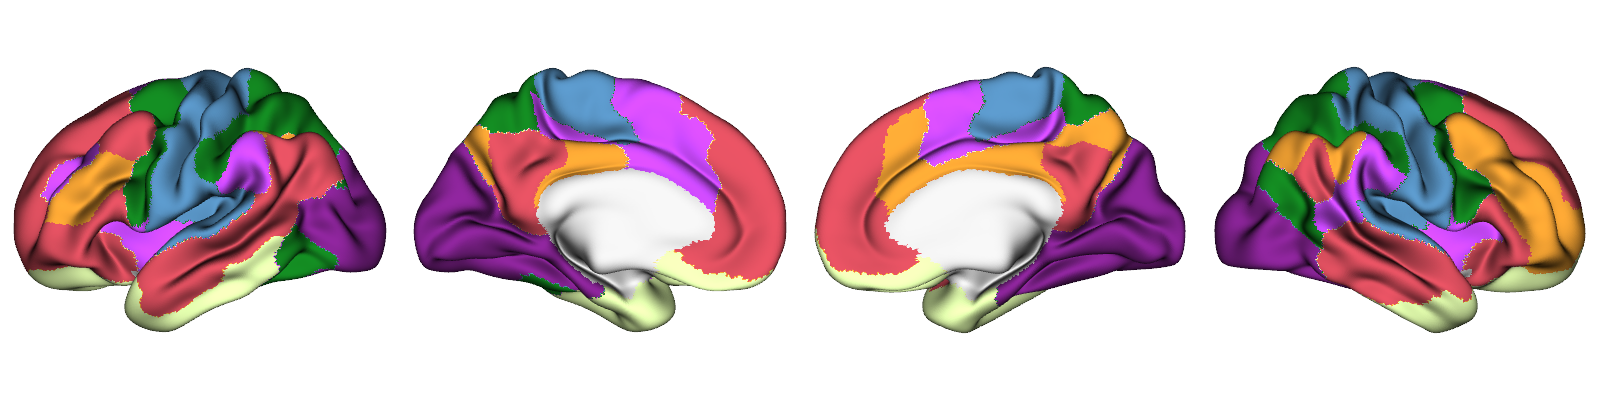

In [6]:
yeo_cmap = LinearSegmentedColormap.from_list("yeo", yeo_colors, 7)
plt.register_cmap("yeo", yeo_cmap)
yeo_cat = pd.Series(yeo, index=parcels, dtype="category")
yeo_cat = yeo_cat.cat.reorder_categories(
    ["Vis", "SomMot", "DorsAttn", "SalVentAttn", "Limbic", "Cont", "Default"]
)
yeo_surf = transform.deparcellate_surf(
    yeo_cat.cat.codes, "schaefer-100", space="fsaverage", concat=True
)
plot.plot_surface(
    yeo_surf,
    "fsaverage",
    mesh_kind="semi-inflated",
    cmap="yeo",
    cbar=False,
    layout_style="row",
    # filename='./figures/4B1.svg'
)

Spin test:

In [10]:
yeo_categorical = (
    pd.Series(yeo, index=parcels)
    .astype("category")
    .cat.reorder_categories(
        ["Vis", "SomMot", "DorsAttn", "SalVentAttn", "Limbic", "Cont", "Default"]
    )
)
stats_yeo, p_yeo = stats.anova_spin(
    stats_age_pnc["t"], yeo_categorical, "schaefer-100", n_perm=1000
)
print(p_yeo["F"])

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.56it/s]

0.0


In [11]:
if p_yeo["F"] < 0.05:
    # bonferroni
    alpha = 0.05 / (p_yeo.shape[0] - 1)
    print(p_yeo[p_yeo < alpha])
    print(stats_yeo[p_yeo < alpha])

F                   0.000
Vis-Limbic          0.000
Vis-Cont            0.000
Vis-Default         0.000
SomMot-Limbic       0.002
SomMot-Cont         0.000
SomMot-Default      0.000
DorsAttn-Default    0.002
dtype: float64
F                   13.846545
Vis-Limbic           4.865062
Vis-Cont             6.013828
Vis-Default          8.415369
SomMot-Limbic        4.336134
SomMot-Cont          5.661853
SomMot-Default       7.906095
DorsAttn-Default     3.479831
dtype: float64


## C. Developmental specific expression analysis

Run CSEA tool: (Note: this sends an online request to the tool and will require internet connection + the CSEA tool website must be live)

In [7]:
nlog_dsea_res, p_spin, raw_dsea_res, top_genes, pls = stats.dsea_spin(
    stats_age_pnc[['t']], 'schaefer-100', 
    memmap='pnc_dsea_null_n-1000_seed-0.npy', n_perm=1000,
    seed=0, n_genes=500, fdr=True, pSI="0.05",
    mirror='http://doughertytools.wustl.edu/cgi-bin/seaBrainRegion.cgi',
)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
continuing from permutation 1000


0it [00:00, ?it/s]


Positively-correlated genes:

In [13]:
print(*top_genes[0]["pos"], sep=" ")

MTIF3 MINDY2 GBP2 SLC2A11 PDZD7 RPS6KA2 LRP8 KIAA1551 ZNF565 PHF6 RAX2 IL17RC KCNIP2 ICE2 ANTXR2 EPHA7 KCNN4 BRAT1 CEP97 ZNF638 RWDD4 ANKRD18A ZNF417 SNHG17 PCNT FREM1 GK5 NRIP2 LOC100190986 ITGA11 LRRCC1 WSB1 WASHC2C SEPT14 SLC31A1 CEP350 BACE2 MATN3 GUSB LAMA4 PRR16 EPB41L1 SULT1A2 LOC283788 CTRL GOLGA2P5 PRAC1 MTTP PMS2P7 MPP5 ABTB2 MYO9B USH1C KCTD3 GUSBP3 LOC641746 ZDHHC20 ANKRD20A9P UNC13C ALS2CR12 PVR TBC1D8 UBE2O ZC3H11B RSPO2 MRPS11 KIAA1841 PMEPA1 GOLGA4 CAPN2 QRFPR CCT6A TMEM120B VAV3 LOC401320 TSTD3 CUX1 PECR TARSL2 TAP1 ZNF485 SUGT1P1 SEMA3A ATR OTUD7A ZNF234 HNRNPH1 ANXA5 ATP10A INTS6L RPS6KB2 TRAK2 MGST2 CCDC138 PXN CHST12 NEAT1 MICB HDAC4 CALCOCO2 SYT6 TRIP4 DSCAML1 PTPRD HNRNPCL1 KANK4 ACO1 MBD2 CBWD5 CDYL UTP14A ILDR1 ZNF644 PATJ CCDC88A MRPS5 MYLK NUTM2B-AS1 UPF1 CDR1 RAD51-AS1 ZEB2 PHACTR4 EDNRA PLEKHH2 HERC2P11 FRG1BP GFRA1 DPY19L2P4 CLCN4 TYW1B PTPN1 MLXIP ZZEF1 DDX24 TMEM41B EIF3E ACOT9 CLN3 C5orf24 MCM4 B3GLCT ANKRD13A SNX20 SPAG8 PIGC TRMT13 FAT3 LINC00367 TXLN

Their aggregate expression:

0 of 313 genes do not exist


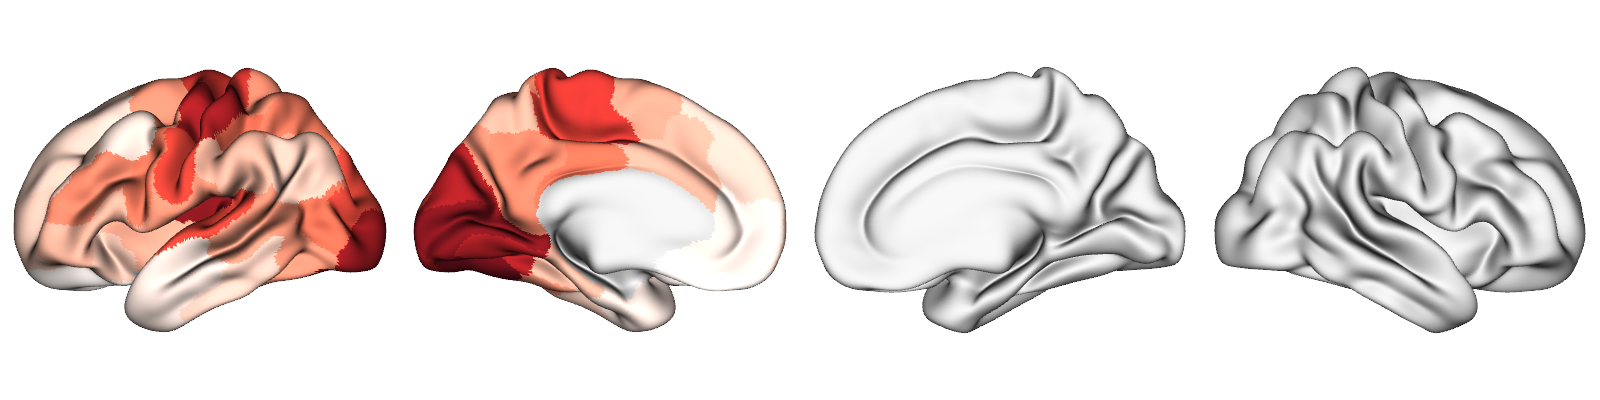

In [8]:
plot.plot_surface(
    transform.deparcellate_surf(
        datasets.load_aggregate_gene_expression(top_genes[0]["pos"], "schaefer-100"),
        "schaefer-100",
        space="fsaverage",
        concat=True,
    ),
    "fsaverage",
    mesh_kind="semi-inflated",
    cmap="Reds",
    cbar=False,
    # filename='./figures/4C0.svg'
)

Negatively-correlated genes:

In [15]:
print(*top_genes[0]["neg"], sep=" ")

ABCC12 CDH8 NECTIN1 MYBPC1 CAPN12 SPACA9 ST6GALNAC5 COL10A1 TMIE GULP1 GYG2 RRP7BP CD53 CDC6 PKD2L1 CACNB2 CARTPT DNLZ PTPN9 SMIM24 ASS1 MUM1L1 HPGDS SERPINF1 OSCP1 FOXN3-AS1 HMGB3 LKAAEAR1 TMEM54 PGAM5 FZD9 SAMD14 KCNB2 TAF10 SLC39A4 TMEM160 TGFBR3L DGKZ NT5DC2 MRPL44 FAM174B NLE1 DENND1C OLFM3 TTPAL SH2D5 SAP30BP CDK20 MED4 CLPB PTP4A3 FLJ20021 CEP83 GGN ARF3 YBX2 TMEM8A SH3KBP1 VPS37D HES4 NIP7 CCKBR MAGIX FAM173A NEUROD6 VAMP2 CPNE8 HTR3B LINC01176 EFNB2 TMIGD3 SLC29A3 SURF4 TOR1A LOC105378853 LIMD2 PIK3CD SATL1 RCSD1 EXOSC4 SNX32 GDF11 TBPL1 SPRN THRB TMEM53 MEA1 LOC105374546 MAPK11 FIG4 OR14I1 MAPKAP1 GALNTL5 DDX20 MIR7-3HG BOP1 ITPKA TAMM41 FOXRED2 TFPT LY6E NOV AGRN SLC30A3 KIF17 EHBP1L1 NEK6 CRYM COL23A1 RITA1 TNFSF13B SEMA6B FREM3 BTRC POLA2 MARC1 POLR3K CBFA2T3 CACNG3 ZER1 HAMP PKP3 CTXN1 DRG2 MED8 UBE2MP1 ARMC10 ERH RTN4RL1 SERPINI2 TRAPPC5 ARFIP2 TM7SF2 C16orf87 KLK5 CLDND2 MCHR2 TRMT12 PCDH19 C11orf95 TTC9C BCAR3 GPNMB HSD11B1L FAM86B3P GIT1 FAM182B LHPP GRM8 AKIP1 SYNGR3

Their aggregate expression:

0 of 187 genes do not exist


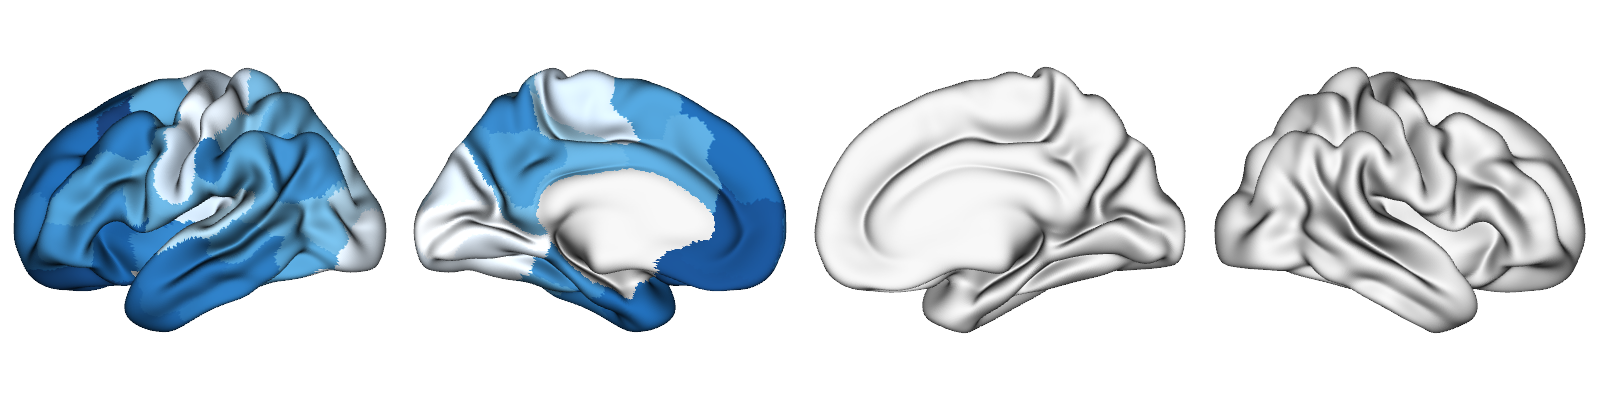

In [9]:
plot.plot_surface(
    transform.deparcellate_surf(
        datasets.load_aggregate_gene_expression(top_genes[0]["neg"], "schaefer-100"),
        "schaefer-100",
        space="fsaverage",
        concat=True,
    ),
    "fsaverage",
    mesh_kind="semi-inflated",
    cmap="Blues",
    cbar=False,
    # filename='./figures/4C1.svg'
)

Plot negative log p of Fischer exact tests, and indicate significance based on spin test p-values:

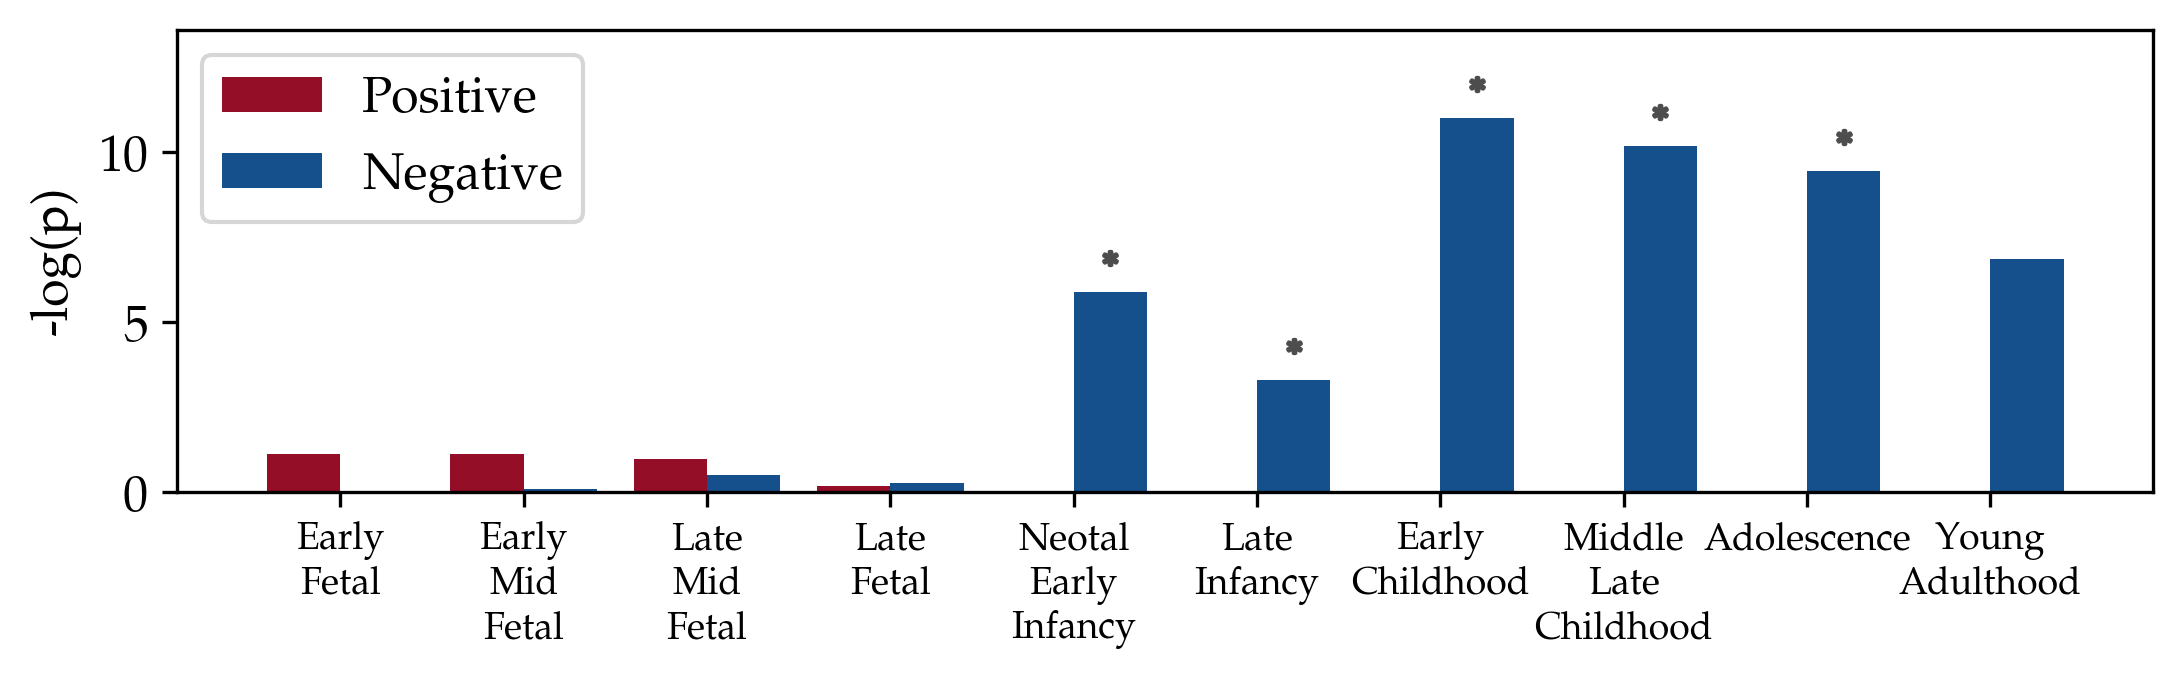

In [14]:
# FDR correction of spin p-values
_, p_fdr_spin = statsmodels.stats.multitest.fdrcorrection(p_spin)
p_fdr_spin = pd.Series(p_fdr_spin, index=p_spin.index)
# plot with significance based on p_fdr_spin < 0.05
sigs = {k: pd.Series(v) for k, v in (p_fdr_spin < 0.05).unstack().to_dict().items()}
fig, ax = plt.subplots(figsize=(8.5, 2))
stats.dsea_plot(nlog_dsea_res, sigs, colors={'Positive':red, 'Negative':blue}, ax=ax)
# fig.savefig('./figures/4C2.svg', bbox_inches='tight', pad_inches=0, dpi=1200)